# BATINA AGASA FERVENT
## Homework 4


In [4]:
#1)How many actors played in more than 2 movie ? Get their names and year they were born.
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"),name="neo4j")
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
with play, count(m) as film where film > 2
return play
"""
graph.run(query)
# Les acteurs qui ont joué dans deux films et leurs dates de naissance:

play
"(_4:Person {born: 1960, name: 'Hugo Weaving'})"
"(_3:Person {born: 1961, name: 'Laurence Fishburne'})"
"(_2:Person {born: 1967, name: 'Carrie-Anne Moss'})"


In [5]:
#2)In how many movies did Tom hanks play ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person{name:"Tom Hanks"})
with count(play.name) as nombre
return nombre
"""
graph.run(query)
# Tom Hanks a joué dans 24 films

nombre
24


In [7]:
#3) In average in how many movies do actors play in ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
with play, count(m) as film
return avg(film)
"""
graph.run(query)
# En moyenne, les acteurs jouent dans 1.6862745098039214 films

avg(film)
1.6862745098039214


In [8]:
#4) In average how many actors are there in a movie ?
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
with m, count(play.name) as nombre
return avg(nombre)
"""
graph.run(query)
# En moyenne, il y a 4.526315789473684 acteurs par film

avg(nombre)
4.526315789473684


In [9]:
#5) In average how many writers is needed to write a movie ?
query= """
MATCH (P:Person)-[:WROTE]->(m:Movie)
with m,count(P.name) as nombre
RETURN avg(nombre)
"""
graph.run(query)
# En moyenne, il y a 1.2500000000000002 écrivains pour écrire un film

avg(nombre)
1.2500000000000002


In [28]:
# 6) What is the proportion of writers that also directed the movie ?
# On a d'abord le nombre d'écrivain qui sont aussi directeur :
query1 ="""
MATCH (m:Movie)<-[:WROTE]-(d:DIRECTED)
with count(d.name) as nombre
return nombre
"""
graph.run(query1)
# Il n'y a pas d'écrivains qui est aussi directeur

nombre
0


C:\Users\ferve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year.released', ylabel='Density'>

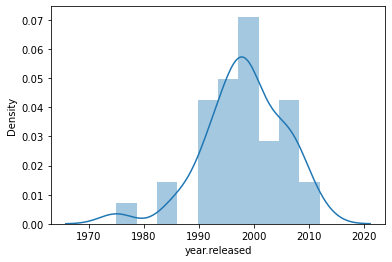

In [29]:
# 7) Do an histogram of the year of release for the movies.
import seaborn as sns
%matplotlib inline
query =""" Match (year:Movie) return year.released """
data =graph.run(query).to_data_frame()
sns.distplot(data['year.released'])

In [44]:
# 8) Who are the 10 actors with the most movie played in
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
return play.name ,count(m) as nombre_films
Order by nombre_films desc
Limit 10
"""
graph.run(query)

play.name,nombre_films
Tom Hanks,24
Keanu Reeves,14
Meg Ryan,10


In [45]:
# 9) Delete every movie made by a director of your choosing
query="""
MATCH (p:Person{name:"Jessica Thompson"})-[:DIRECTED]->(m:Movie)
DETACH DELETE m
"""
graph.run(query)


(No data)

In [82]:
# 10) Give some statistics that you find interesting.

query1 = """
MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors),
(coActors)-[:ACTED_IN]->(m2)<-[:ACTED_IN]-(cocoActors) , (m:Movie)
WHERE NOT (tom)-[:ACTED_IN]->()<-[:ACTED_IN]-(cocoActors) AND tom <>cocoActors
RETURN coActors.name AS Recommended, count(*) AS Str, m.released
ORDER BY Str desc
"""
data = graph.run(query1).to_data_frame()
data.describe()

#En moyenne, 10 personnes ne collaborent pas avec Tom Hanks après qu'on les ait recommandées

,Str,m.released
count,16.000000,16.000000
mean,10.125000,1997.562500
std,8.777813,5.726765
min,2.000000,1990.000000
25%,4.000000,1994.500000
50%,6.000000,1998.000000
75%,16.000000,1999.000000
max,28.000000,2012.000000
